<a href="https://colab.research.google.com/github/Jinyoung9393/AIFFEL_ONLINE_QUEST/blob/master/2023.08.09/CIFAR10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [59]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
from tensorflow.keras import models, layers
from tensorflow.keras.datasets import cifar10

In [60]:
# 문제 3-1: cifar10 데이터셋을 로드하고, 훈련 데이터셋에서 20%를 검증 데이터셋으로 분리합니다.

(x_train_full, y_train_full), (x_test, y_test) = cifar10.load_data()
x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full, test_size=0.20)

# 훈련, 검증, 테스트 데이터와 레이블 종류가 몇개인지 출력합니다.
print("전체 학습 데이터: {} 레이블: {}".format(x_train_full.shape, y_train_full.shape))
print("학습 데이터: {} 레이블: {}".format(x_train.shape, y_train.shape))
print("검증 데이터: {} 레이블: {}".format(x_val.shape, y_val.shape))
print("테스트 데이터: {} 레이블: {}".format(x_test.shape, y_test.shape))

전체 학습 데이터: (50000, 32, 32, 3) 레이블: (50000, 1)
학습 데이터: (40000, 32, 32, 3) 레이블: (40000, 1)
검증 데이터: (10000, 32, 32, 3) 레이블: (10000, 1)
테스트 데이터: (10000, 32, 32, 3) 레이블: (10000, 1)


In [61]:
# cifar10의 분류에 해당하는 'airplane', 'automobile', 'bird', 'cat', 'deer',
# 'dog', 'frog', 'horse', 'ship', 'truck'를 class_name으로 정의합니다.
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

<ipython-input-62-6d8a43ba86bc>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


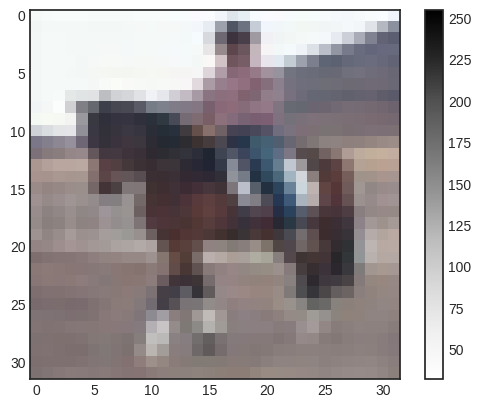

In [62]:
# 훈련 데이터의 0번째인 x_train[0]를 이미지로 시각화합니다.
plt.style.use('seaborn-white')

plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.show()

In [63]:
# 훈련, 검증, 테스트 데이터의 형태(shape)을 출력합니다.
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(40000, 32, 32, 3)
(10000, 32, 32, 3)
(10000, 32, 32, 3)


In [71]:
# 문제 3-2: 훈련, 검증, 테스트 데이터의 형태(shape)을 32 * 32 * 3 = 3072로 변형합니다.
x_train = x_train.reshape((x_train.shape[0], 32 * 32 * 3))
x_val = x_val.reshape((x_val.shape[0], 32 * 32 * 3))
x_test = x_test.reshape((x_test.shape[0], 32 * 32 * 3))

print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(40000, 3072)
(10000, 3072)
(10000, 3072)


In [72]:
# 훈련, 검증, 테스트 데이터를 255로 나누어 0~1 사이의 값으로 변환합니다.
x_train = x_train / 255.
x_val = x_val / 255.
x_test = x_test / 255.

In [76]:
# 문제 3-3: BatchNormalization과 Dropout을 적용하여 빠른 학습과 과대적합을 방지하고,
# 10개의 이미지를 분류하는 딥러닝 모델을 구성합니다.
# 필요한 라이브러리 import
model = models.Sequential()
model.add(layers.InputLayer(input_shape=(3072,)))
model.add(layers.BatchNormalization())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.3))
model.add(layers.BatchNormalization())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.BatchNormalization())
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [77]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization_12 (Bat  (None, 3072)             12288     
 chNormalization)                                                
                                                                 
 dense_19 (Dense)            (None, 512)               1573376   
                                                                 
 dropout_12 (Dropout)        (None, 512)               0         
                                                                 
 batch_normalization_13 (Bat  (None, 512)              2048      
 chNormalization)                                                
                                                                 
 dense_20 (Dense)            (None, 256)               131328    
                                                                 
 dropout_13 (Dropout)        (None, 256)              

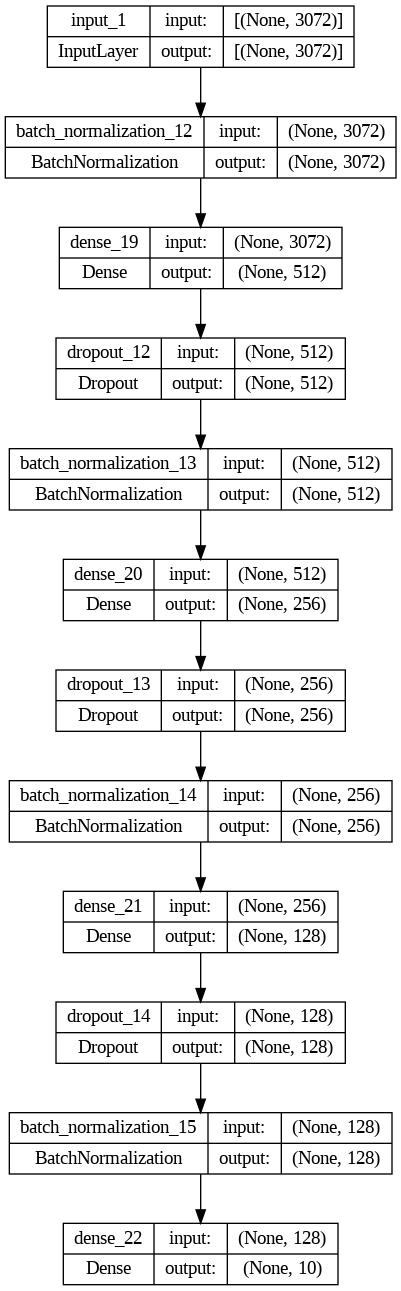

In [78]:
# 필요한 모듈 가져오기
from tensorflow.keras import utils

# 모델 구조 시각화
utils.plot_model(model, show_shapes=True)


In [79]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
# 문제 3-4: ModelCheckpoint와 EarlyStopping 콜백 함수를 적용하여 모델 학습을 진행합니다.
# ModelCheckpoint와 EarlyStopping 콜백 정의
check_point_cb = ModelCheckpoint('best_model.h5', save_best_only=True)
early_stopping_cb = EarlyStopping(patience=10, monitor='val_loss', restore_best_weights=True)

# 모델 학습
history = model.fit(
    x_train, y_train,
    epochs=50, batch_size=64,
    validation_data=(x_val, y_val),
    callbacks=[check_point_cb, early_stopping_cb])

Epoch 1/50
625/625 [==============================] - 31s 45ms/step - loss: 1.9866 - accuracy: 0.3015 - val_loss: 1.7627 - val_accuracy: 0.3558
Epoch 2/50
625/625 [==============================] - 27s 44ms/step - loss: 1.7303 - accuracy: 0.3765 - val_loss: 1.5774 - val_accuracy: 0.4265
Epoch 3/50
625/625 [==============================] - 29s 46ms/step - loss: 1.6371 - accuracy: 0.4130 - val_loss: 1.4960 - val_accuracy: 0.4610
Epoch 4/50
625/625 [==============================] - 28s 45ms/step - loss: 1.5907 - accuracy: 0.4313 - val_loss: 1.4866 - val_accuracy: 0.4619
Epoch 5/50
625/625 [==============================] - 27s 43ms/step - loss: 1.5612 - accuracy: 0.4373 - val_loss: 1.4457 - val_accuracy: 0.4814
Epoch 6/50
625/625 [==============================] - 28s 44ms/step - loss: 1.5270 - accuracy: 0.4539 - val_loss: 1.4213 - val_accuracy: 0.4845
Epoch 7/50
625/625 [==============================] - 28s 45ms/step - loss: 1.5028 - accuracy: 0.4611 - val_loss: 1.4785 - val_accuracy:

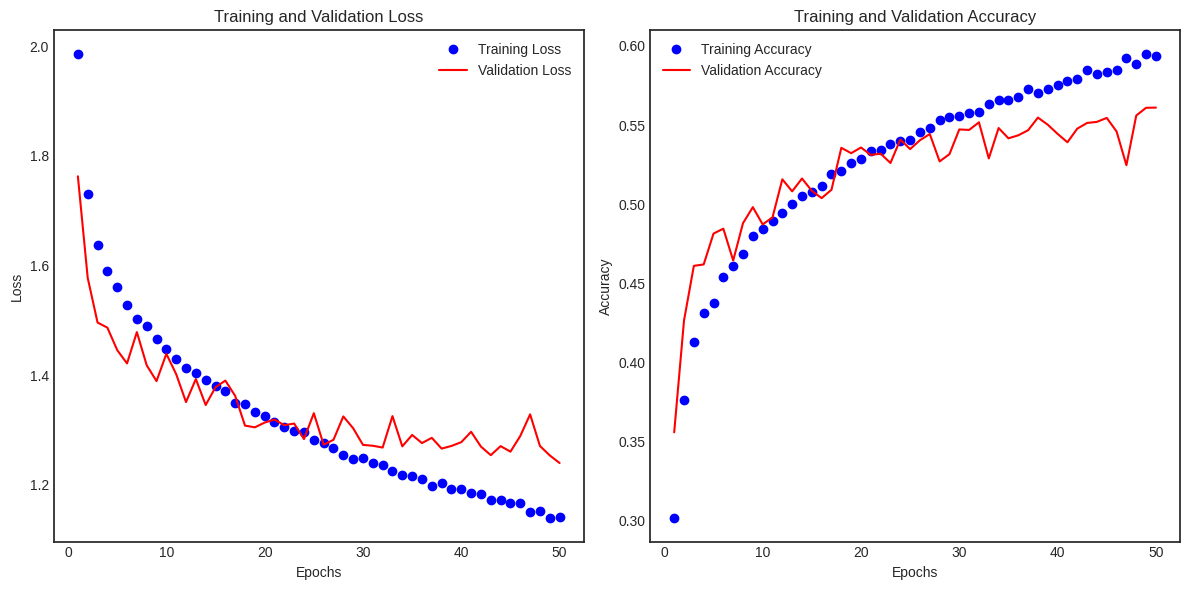

In [84]:
import matplotlib.pyplot as plt

# 훈련과정에서의 손실과 정확도 추출
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# 에포크의 수
epochs = range(1, len(train_loss) + 1)

# 손실 그래프
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# 정확도 그래프
plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracy, 'bo', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


In [85]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 4s 14ms/step - loss: 1.2260 - accuracy: 0.5628


[1.2260315418243408, 0.5627999901771545]